# Telecust1 
## ewaluacja modeli uczenia maszynowego z wykorzystaniem biblioteki scikit-learn
**Dane dotyczą użytkowników sieci komórkowej 

## Punkt 1
**W notatniku Jupyter przygotuj sprawozdanie, w którym opiszesz co zawiera wybrany
przez Ciebie zestaw danych i podsumujesz efekty tworzenia i ewaluacji modelu uczenia
maszynowego. Wykorzystaj możliwości edytora tekstowego markdown, poszczególne
operacje, możesz opisać za pomocą komentarzy w kodzie #


Column Name - Description and Specifics<br>
Region - Region code to the area where customers belong.<br>
Tenure - Their span of choosing the company.<br>
Age - Age of the customers.<br>
Income - Their average Salaries<br>
Marital - Their Martial Status<br>
Address - Address Zone<br>
Ed - Education Group<br>
Employ - Employment Years<br>
Retire - Retirement Status<br>
Gender - Their Gender<br>
Reside - Area Code where they live<br>

Custcat 	Customer Category (Target Variable) -- podsumowaniem jest dopasowanie potencjaolnego, przyszłego użytkownika do konkretnej grupy 

In [11]:
#importowanie bibliotek 
import pandas as pd # working with data
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from mpl_toolkits.mplot3d import Axes3D # 3d plot
#from termcolor import colored, cprint # text customization

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.cluster import KMeans # K-means algorithm

plt.rcParams['figure.figsize'] = (20, 10)
sb.set_style('whitegrid')

## Punkt 2
Dokonaj podstawowej analizy statystycznej wybranego zestawu danych (średnia,
mediana, wariancja i inne), przekształć dane tekstowe na nowe kolumny, by miały
wartość liczbową lub boolowską, przygotuj zestaw danych do dalszej analizy.

In [63]:
df = pd.read_csv('tel.csv')

tel = df
tel.head(10)

,Unnamed: 0,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat,0
0,0,2,13,44,64,False,9,4,5,0,0,2,1,False
1,1,3,11,33,136,False,7,5,5,0,0,6,4,False
2,2,3,68,52,116,False,24,1,29,0,1,2,3,False
3,3,2,33,33,33,False,12,2,0,0,1,1,1,False
4,4,2,23,30,30,False,9,1,2,0,0,4,3,False
5,5,2,41,39,78,False,17,2,16,0,1,1,3,False
6,6,3,45,22,19,False,2,2,4,0,1,5,2,False
7,7,2,38,35,76,False,5,2,10,0,0,3,4,False
8,8,3,45,59,166,False,7,4,31,0,0,5,3,False
9,9,1,68,41,72,False,21,1,22,0,0,3,2,False


Bardzo ważny element informujący o stanie danych.<br> 
W poniższych tabelach możemy sprawdzić, czy wszystkie dane, które chcę brać pod uwagę podczas budowania modelu, posiadają taką samą ilość wyników - są równoliczne "count", oraz czy posiadają podobne średnie "mean". Zmienne trzeba będzie znormalizować na kolejnych etapach oczyszczania danych. 

In [13]:
df.describe()

,Unnamed: 0,region,tenure,age,income,address,ed,employ,retire,gender,reside,custcat
count,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,2.0220,35.526000,41.684000,77.535000,11.551000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,288.819436,0.8162,21.359812,12.558816,107.044165,10.086681,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,0.000000,1.0000,1.000000,18.000000,9.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,249.750000,1.0000,17.000000,32.000000,29.000000,3.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,499.500000,2.0000,34.000000,40.000000,47.000000,9.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,749.250000,3.0000,54.000000,51.000000,83.000000,18.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,999.000000,3.0000,72.000000,77.000000,1668.000000,55.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [14]:
#zamiana wartości "A","B","C","D" na wartości liczbowe
df['custcat'] = df['custcat'].replace({'A': '1', 'B':'2', 'C':'3', 'D':'4'})
df.to_csv("tel.csv", index=False)
  
print(df)

     Unnamed: 0  region  tenure  age  income  marital  address  ed  employ  \
0             0       2      13   44      64    False        9   4       5   
1             1       3      11   33     136    False        7   5       5   
2             2       3      68   52     116    False       24   1      29   
3             3       2      33   33      33    False       12   2       0   
4             4       2      23   30      30    False        9   1       2   
..          ...     ...     ...  ...     ...      ...      ...  ..     ...   
995         995       3      10   39      27    False        0   3       0   
996         996       1       7   34      22    False        2   5       5   
997         997       3      67   59     944    False       40   5      33   
998         998       3      70   49      87    False       18   2      22   
999         999       3      50   36      39    False        7   3       3   

     retire  gender  reside  custcat      0  
0         0      

A=1 <br>
B=2 <br>
C=3 <br>
D=4 <br>

## Punkt 3
Kilkukrotnie, dla dwóch dowolnych cech (X) dokonaj graficznej klasyfikacji – wyświetl
wykresy dla różnych cech 

C:\Users\rafal\AppData\Local\Temp\ipykernel_14120\3535166205.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['age'],


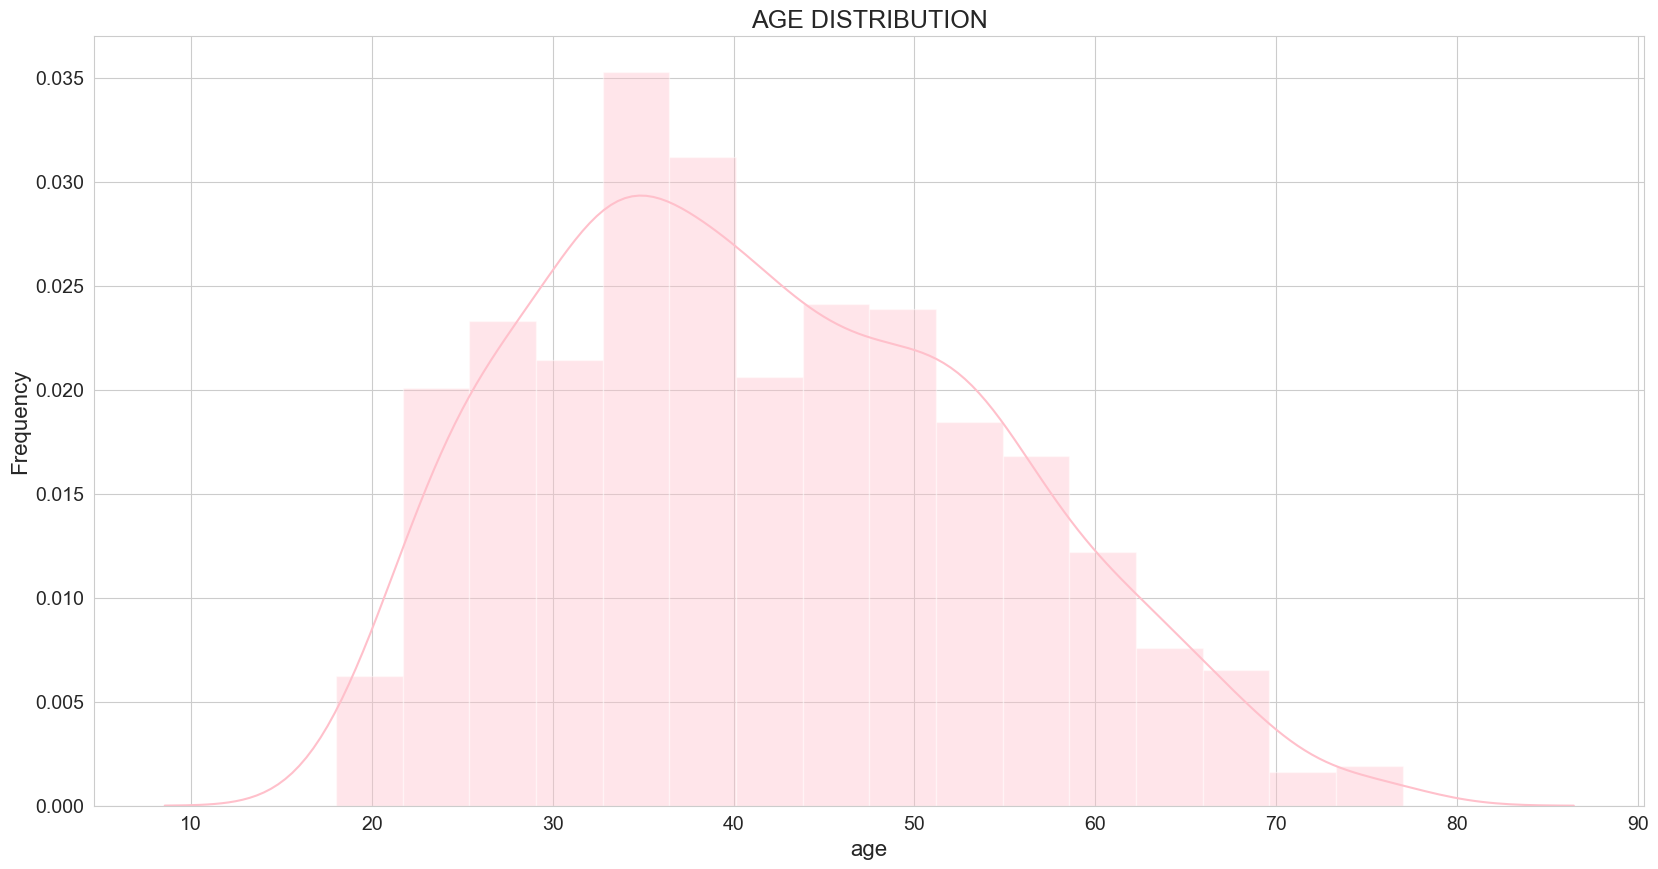

In [15]:
# Age distribution
sb.distplot(df['age'], 
            color = 'pink')
plt.title('AGE DISTRIBUTION', 
          fontsize = 18)
plt.xlabel('age', 
           fontsize = 16)
plt.ylabel('Frequency', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('age_distribution.png')
plt.show()

Możemy tutaj zobaczyć, że wykres posiada rozkład normalny

Text(0, 0.5, 'age')

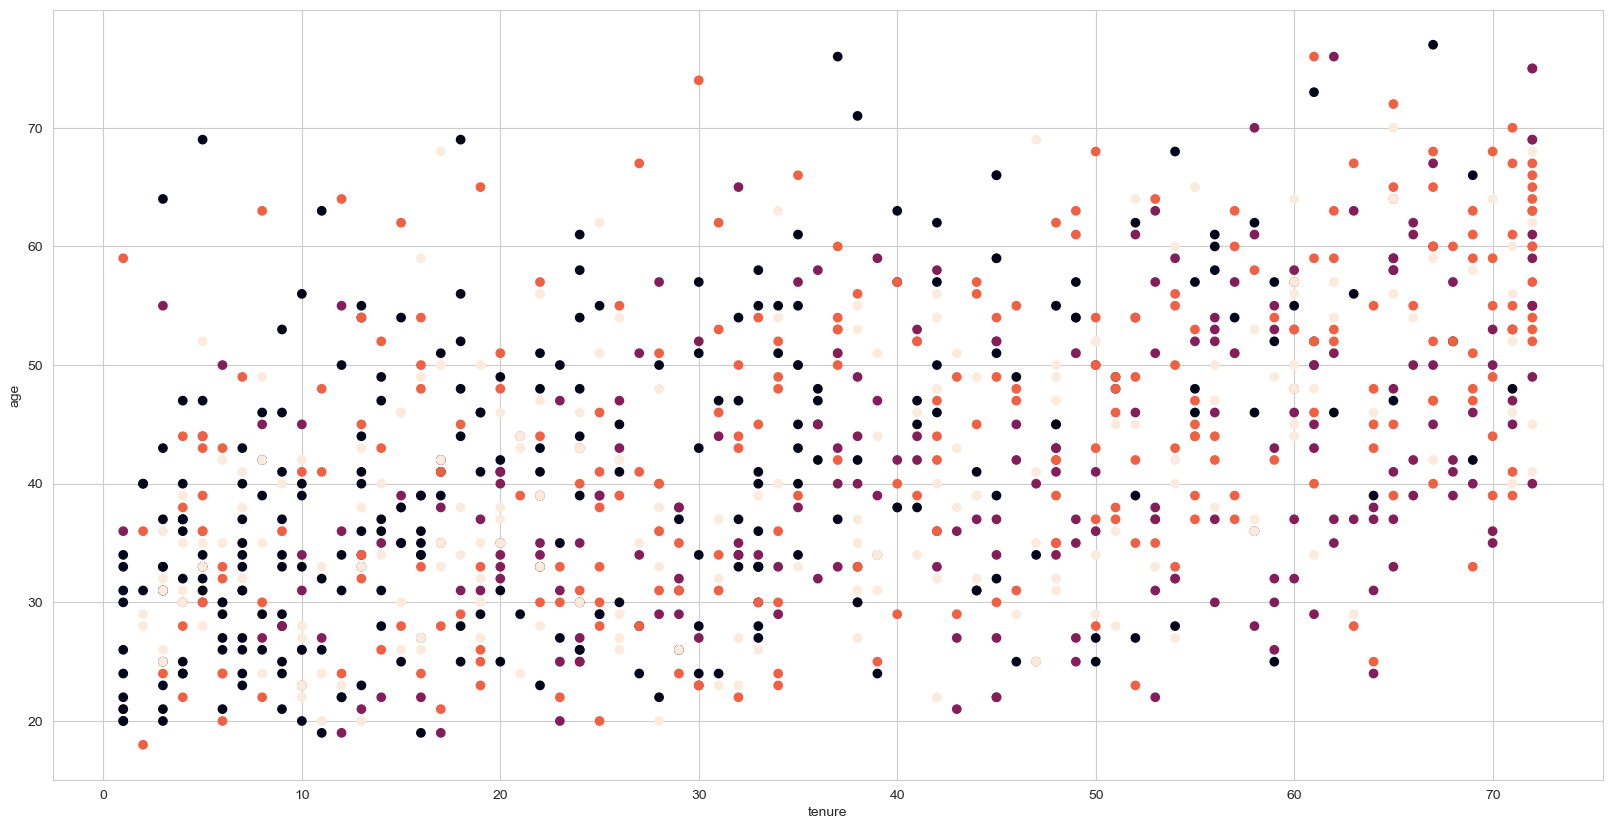

In [16]:
plt.scatter(df['tenure'], df['age'], c=df['custcat'])
plt.xlabel('tenure')
plt.ylabel('age')

Widzimy tutaj bardzo duży rozrzut klasyfikacji danych. Spróbujmy wziąć inne dane i przeanalizować ich wplyw na formowanie się klasyfikacji "custcat"

Text(0, 0.5, 'age')

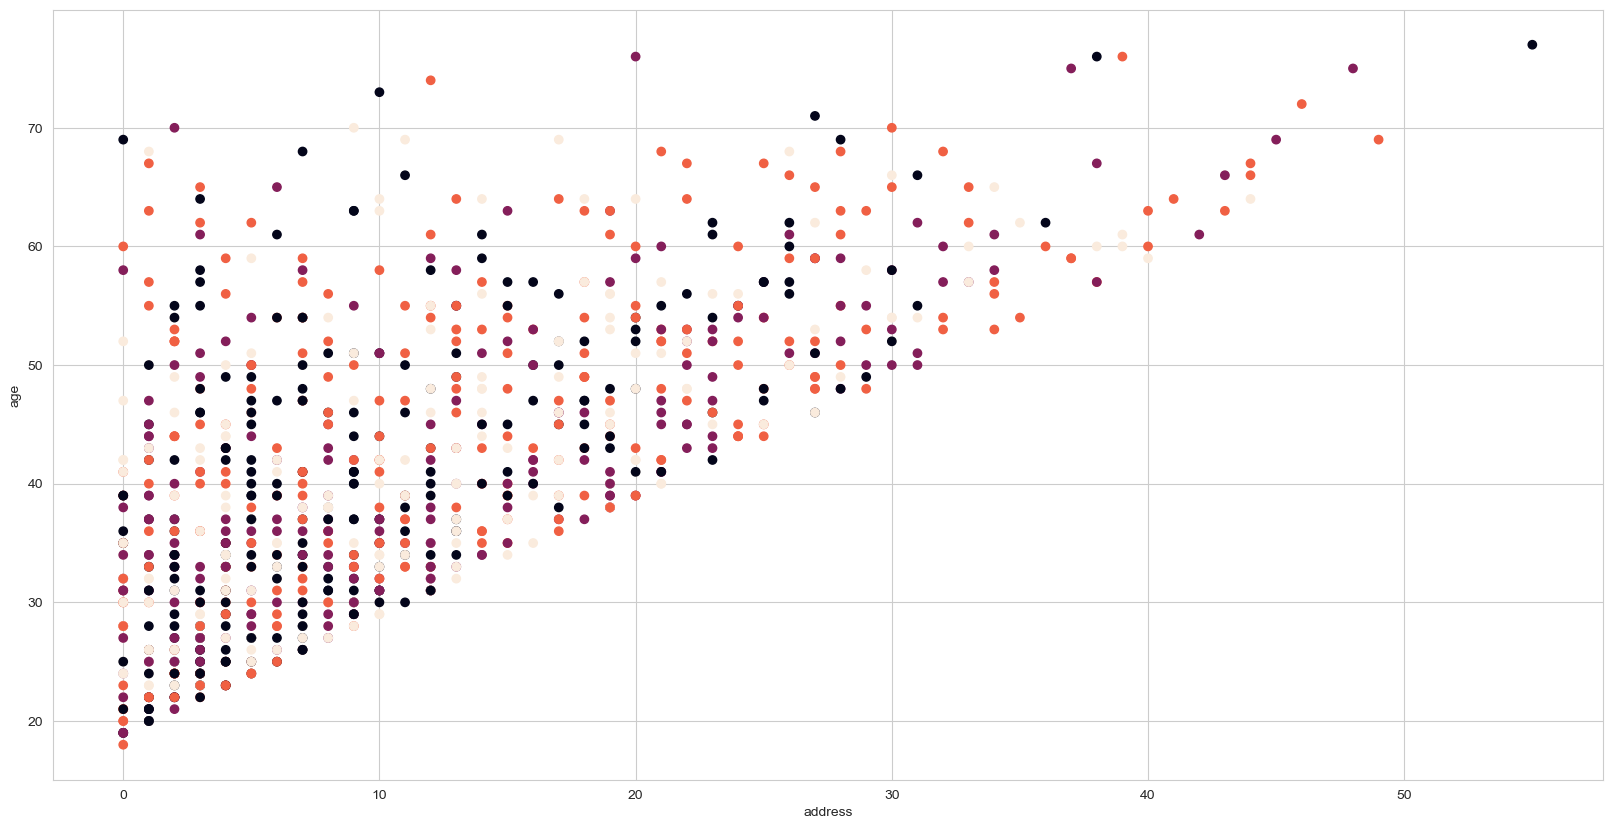

In [17]:
plt.scatter(df['address'], df['age'], c=df['custcat'])
plt.xlabel('address')
plt.ylabel('age')

Klasyfikacja pod względem zmiennej adres i wiek jest lepiej posegregowana niż w przypadku "tenure". Możemy tutaj również zauważyć wartości odstające.  

## Punkt 4
Zbuduj model uczenia maszynowego wykorzystujący regresję logistyczne, zbuduj
model dla dwóch i więcej cech 

Na podstawie danych "age" oraz "address" chcę stworzyć swój model uczenia maszynowego

In [18]:
#segregacja informacji potrzebnych do zaimportowania do modelu 
df = df.iloc[:,0:6]
df

,Unnamed: 0,region,tenure,age,income,marital
0,0,2,13,44,64,False
1,1,3,11,33,136,False
2,2,3,68,52,116,False
3,3,2,33,33,33,False
4,4,2,23,30,30,False
...,...,...,...,...,...,...
995,995,3,10,39,27,False
996,996,1,7,34,22,False
997,997,3,67,59,944,False
998,998,3,70,49,87,False


In [19]:
#model regresji logistycznej dla dwóch zmiennych
import pandas as pd
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('tel.csv')
X = df[['address', 'age']].values
y = df['custcat'].values
model = LogisticRegression()
model.fit(X, y)
print(model.coef_, model.intercept_)


[[-0.02189698 -0.00217233]
 [ 0.0176808  -0.00815548]
 [ 0.00617441  0.01485719]
 [-0.00195824 -0.00452938]] [ 0.3991436   0.00727491 -0.5762594   0.1698409 ]


In [20]:
#model regresji logistycznej dla dwóch poprzednich zmiennych zwiększony o zmienną 'tenure'
import pandas as pd
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('tel.csv')
X = df[['address', 'age', 'tenure']].values
y = df['custcat'].values
model = LogisticRegression()
model.fit(X, y)
print(model.coef_, model.intercept_)

[[ 0.0005099   0.01137195 -0.03078482]
 [ 0.00217457 -0.01894524  0.02328758]
 [ 0.00076333  0.01272967  0.00617008]
 [-0.0034478  -0.00515638  0.00132716]] [ 0.59440574 -0.22172478 -0.59568301  0.22300206]


## Punkt 5
Dokonaj prognoz na 10 pierwszych rekordach danych zestawu i na danych losowych 

In [21]:
df = pd.read_csv('tel.csv')
X = df[['address', 'age', 'tenure']].values
y = df['custcat'].values
model = LogisticRegression()
model.fit(X, y)
print(model.predict([[9, 44, 13]]))
print(model.predict([[7, 33, 11]]))
print(model.predict([[24, 52, 68]]))
print(model.predict([[12, 33, 33]]))
print(model.predict([[9, 30, 23]]))
print(model.predict([[17, 39, 41]]))
print(model.predict([[2, 22, 45]]))
print(model.predict([[5, 35, 38]]))
print(model.predict([[7, 59, 45]]))
print(model.predict([[21, 41, 68]]))

print(model.predict(X[:3]))
print(y[:3])

[1]
[1]
[3]
[4]
[1]
[3]
[2]
[3]
[3]
[2]
[1 1 3]
[1 4 3]


In [22]:
from random import random

df = pd.read_csv('tel.csv')
X = df[['address', 'age', 'tenure']].values
y = df['custcat'].values
model = LogisticRegression()
model.fit(X, y)

x = np.random.random((10, 32, 8))
y = np.random.random((10, 1, 43))

print(model.predict(X[:3]))
print(y[:3])

[1 1 3]
[[[0.76779477 0.47893928 0.01418882 0.93499801 0.17512313 0.74860878
   0.96950191 0.56719884 0.64970216 0.40192657 0.48244721 0.41684948
   0.43722257 0.25725757 0.85478555 0.71282885 0.56823936 0.09142823
   0.60477772 0.99882501 0.68465536 0.95197392 0.33024879 0.34952441
   0.02129842 0.38004805 0.41472273 0.41558502 0.07576275 0.30830594
   0.34982153 0.88809569 0.9122508  0.17066066 0.08687834 0.80452854
   0.16403852 0.85441283 0.89420361 0.26143999 0.11933714 0.07986763
   0.43715008]]

 [[0.78806343 0.3116634  0.38831877 0.31346148 0.42952031 0.63490688
   0.61245926 0.23320458 0.06649056 0.40524752 0.70195374 0.97653629
   0.7910183  0.54539466 0.24586906 0.81644564 0.40261053 0.47595564
   0.40205253 0.19323464 0.8909358  0.09989491 0.76759474 0.82909677
   0.43918625 0.62808592 0.1374436  0.20946538 0.30692234 0.11114427
   0.48465904 0.820495   0.9802178  0.44459355 0.80954482 0.76607505
   0.95048636 0.61185636 0.52306871 0.01274742 0.73222976 0.18872666
   0.3616

## Punkt 6
Dokonaj ewaluacji modelu podstawowymi metrykami: dokładnością, precyzją,
pełnością i wynikiem F1, podaj i zinterpretuj macierz pomyłek

In [23]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('tel.csv')
X = df[['region', 'tenure', 'age']].values
y = df['custcat'].values
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X)

print("accuracy:", accuracy_score(y, y_pred))
#print("precision:", precision_score(y, y_pred))
#print("recall:", recall_score(y, y_pred))
#print("f1 score:", f1_score(y, y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred))

accuracy: 0.369
[[163  18  67  18]
 [ 54  58  91  14]
 [ 96  46 129  10]
 [102  39  76  19]]


C:\Users\rafal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Dane zaimportowane do modelu to "region", "tenure", "age" oraz "custcat". Model ma za zadanie przewidzieć do której grupy "custcat" będzie należał kolejny klient sieci na podstawie danych "region", "tenure" i "age". W tym celu potrzebne jest stworzenie tablicy macierzy pomyłek. W klasie predykowanej znajdują się pozytywne jak i negatywne wyniki. Tak samo jest w klasie rzeczywistej. Oznacza to, że mamy 4 grupy do których możemy przyporządkować nasze dane, dlatego zatem znajdują się cztery kolumny i cztery wiersze 

## Punkt 7
Dokonaj podziału danych, na podzbiory uczące i testowe, dokonaj ewaluacji (typu holdout), przeprowadź K-krotny sprawdzian krzyżowy

In [24]:
#podział na podzbiory w podziale 75% do 25%
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
df = pd.read_csv('tel.csv')
X = df[['region', 'tenure', 'age']].values
y = df['custcat'].values
X_train, X_test, y_train, y_test = train_test_split(X, y)# losowe umieszczenie w zbiorze uczącym lub zbiorze testowym
print("whole dataset:", X.shape, y.shape)
print("training set:", X_train.shape, y_train.shape)
print("test set:", X_test.shape, y_test.shape)


whole dataset: (1000, 3) (1000,)
training set: (750, 3) (750,)
test set: (250, 3) (250,)


In [25]:
#k-krotny sprawdzian krzyżowy 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
import pandas as pd
df = pd.read_csv('tel.csv')
X = df[['region', 'tenure', 'age']].values
y = df['custcat'].values
kf = KFold(n_splits=5, shuffle=True) #pięciokrotny
splits = list(kf.split(X))
first_split = splits[0]
train_indices, test_indices = first_split
print("training set indices:", train_indices)
print("test set indices:", test_indices)
X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]
print("X_train")
print(X_train)
print("y_train", y_train)
print("X_test")
print(X_test)
print("y_test", y_test)

print(scores)
print(np.mean(scores))
final_model = LogisticRegression()
final_model.fit(X, y)

training set indices: [  0   1   3   4   5   6   7   9  10  11  13  14  16  17  18  19  20  21
  23  24  25  26  27  28  30  31  32  33  34  37  38  39  40  41  42  43
  45  46  47  48  49  50  51  52  55  56  57  58  59  60  61  64  65  66
  67  68  69  70  71  72  73  74  75  76  77  79  80  81  82  83  84  88
  89  90  91  92  93  94  97  98  99 100 101 102 104 105 106 107 108 109
 110 111 112 113 114 116 117 118 120 121 122 125 126 128 129 130 131 132
 133 135 136 137 138 140 141 142 143 144 145 146 147 148 150 151 152 153
 154 155 156 157 158 160 162 163 164 165 167 168 169 170 171 172 173 176
 177 178 179 180 181 183 184 186 187 188 191 192 193 194 195 196 198 201
 202 203 206 207 208 209 211 214 215 217 218 219 220 221 222 223 227 228
 229 230 231 232 234 235 236 237 238 239 240 241 242 243 244 245 246 248
 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 267 268
 269 270 271 272 273 274 275 276 277 278 279 280 281 282 285 286 287 288
 290 291 292 293 295 296 297 

NameError: name 'scores' is not defined

## Punkt 8
Przetestuj model na różnym zestawie cech

In [20]:
#k-krotny sprawdzian krzyżowy 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
import pandas as pd
df = pd.read_csv('tel.csv')
X = df[['ed', 'income']].values
y = df['custcat'].values
kf = KFold(n_splits=5, shuffle=True) #pięciokrotny
splits = list(kf.split(X))
first_split = splits[0]
train_indices, test_indices = first_split
print("training set indices:", train_indices)
print("test set indices:", test_indices)
X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]
print("X_train")
print(X_train)
print("y_train", y_train)
print("X_test")
print(X_test)
print("y_test", y_test)

print(scores)
print(np.mean(scores))


training set indices: [  0   2   3   4   5   6   7   8   9  11  13  14  15  16  17  18  19  20
  21  24  25  26  27  29  30  31  33  34  35  36  38  39  40  41  42  43
  44  45  49  50  52  54  55  56  57  58  59  61  62  65  66  67  69  70
  71  72  73  76  77  78  79  81  82  83  84  85  86  87  88  89  90  91
  92  93  96  98  99 100 101 102 103 104 105 106 108 109 110 111 113 114
 115 119 121 122 123 124 125 126 127 128 129 130 131 132 133 134 136 137
 138 140 141 145 146 147 148 150 151 152 154 155 156 157 158 159 160 162
 163 164 165 166 167 170 171 172 173 174 175 176 177 178 179 180 181 185
 188 189 190 192 193 194 195 196 197 198 199 200 201 204 205 206 207 208
 209 210 211 212 213 214 215 217 218 219 220 221 222 223 224 225 226 227
 229 230 231 232 233 234 235 236 239 240 241 242 243 244 245 246 247 249
 250 251 252 253 254 255 258 259 261 262 263 264 265 266 267 268 269 270
 271 272 273 275 277 279 280 281 282 283 284 285 286 287 288 289 290 291
 293 295 296 297 298 299 302 

NameError: name 'scores' is not defined

## Punkt 9
Dokonaj doboru modelu klasyfikujące za pomocą krzywej charakterystyki roboczej
odbiornika. Krzywa ROC https://mathspace.pl/matematyka/receiver-operatingcharacteristic-krzywa-roc-czyli-ocena-jakosci-klasyfikacji-czesc-7/ oraz https://scikitlearn.org/stable/auto_examples/model_selection/plot_roc.html?highlight=roc Opisz
problem, który można rozwiązać za pomocą tego narzędzia – 3 pkt (2 pkt zastosowania,
1 pkt wizualizacja krzywej za pomocą biblioteki matplotlib.

### Zastosowanie krzywej ROC: <BR>
    - po zastosowaniu miary AUC jesteśmy w stanie stwierdzić poziom wytrenowania naszego modelu 
    - możemy porównywać modele między sobą 
    - możemy zauważyć próg odejścia prawdopodobieństwa

In [46]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('tel.csv')
df.head(10)

,Unnamed: 0,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat,0
0,0,2,13,44,64,False,9,4,5,0,0,2,1,False
1,1,3,11,33,136,False,7,5,5,0,0,6,4,False
2,2,3,68,52,116,False,24,1,29,0,1,2,3,False
3,3,2,33,33,33,False,12,2,0,0,1,1,1,False
4,4,2,23,30,30,False,9,1,2,0,0,4,3,False
5,5,2,41,39,78,False,17,2,16,0,1,1,3,False
6,6,3,45,22,19,False,2,2,4,0,1,5,2,False
7,7,2,38,35,76,False,5,2,10,0,0,3,4,False
8,8,3,45,59,166,False,7,4,31,0,0,5,3,False
9,9,1,68,41,72,False,21,1,22,0,0,3,2,False


In [47]:
X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

In [66]:
from sklearn.model_selection import train_test_split 
X = df[['ed', 'region']].values
y = df['retire'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 4)

In [67]:
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test)

In [68]:
from sklearn.svm import SVC
model_SVC = SVC(kernel = 'rbf', random_state = 4)
model_SVC.fit(X_train, y_train)

y_pred_svm = model_SVC.decision_function(X_test)

In [69]:
from sklearn.linear_model import LogisticRegression 
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_pred_logistic = model_logistic.decision_function(X_test)

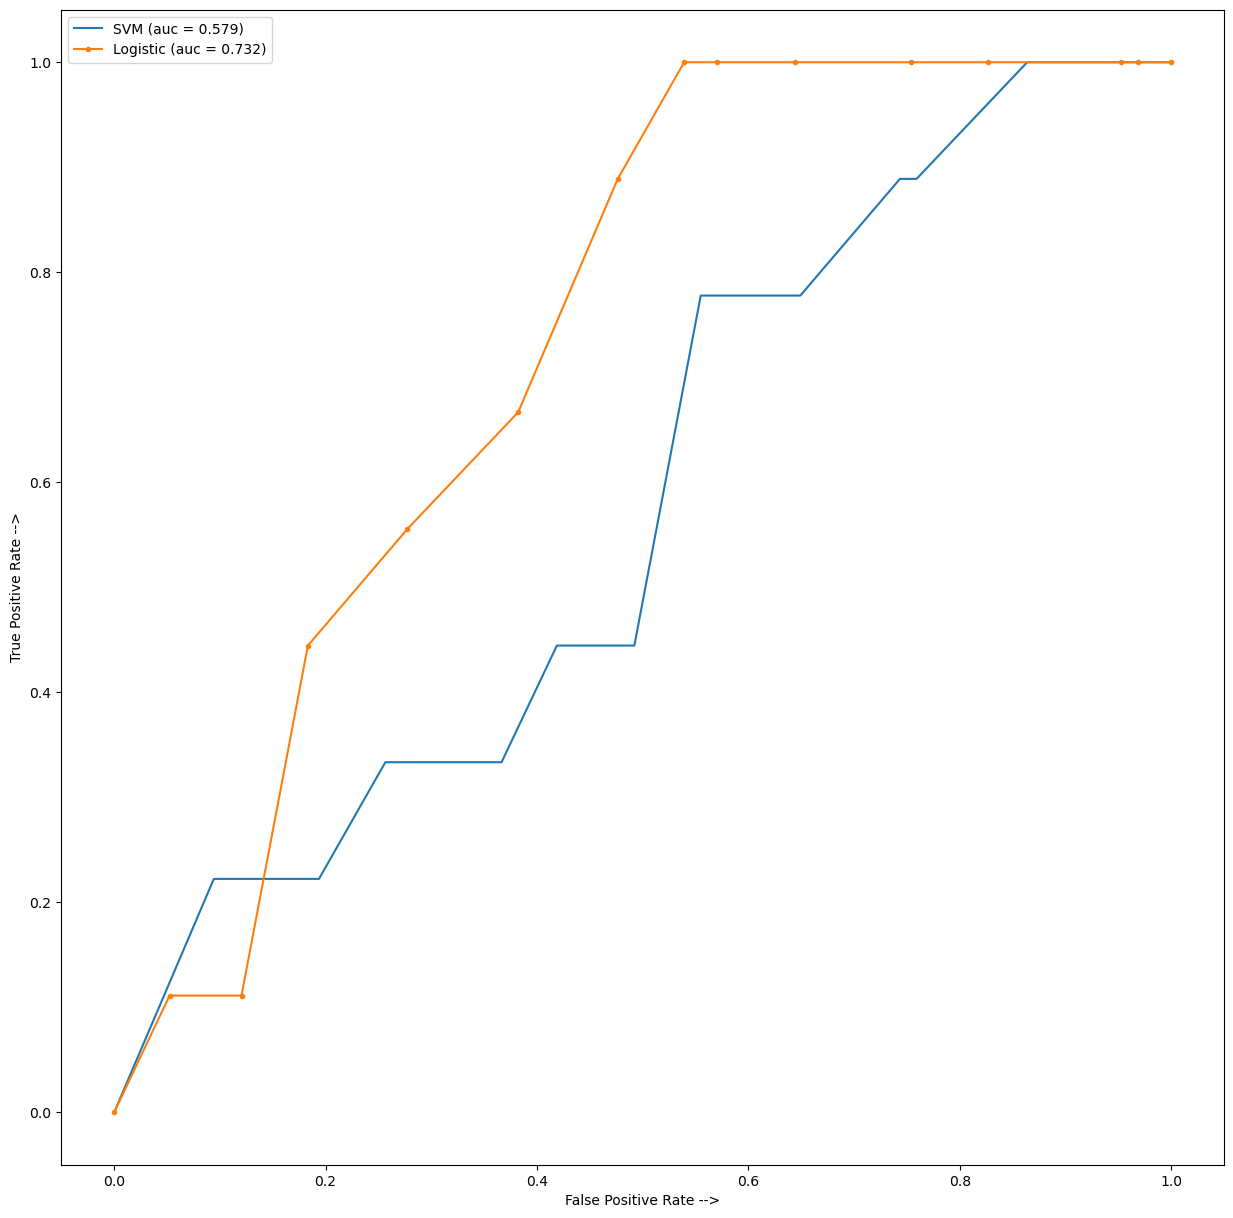

In [70]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)


svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(15, 15), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()